# TASK-1: Prediction using Supervised ML

The task is to predict the percentage of a student based on the number of hours studied using Linear Regression.It is a simple regression task involving only 2 variables.

# Author: Nitin Mohan

Importing required libraries

In [1]:
import numpy as np
import pandas as pd 
import plotly as py
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
data = pd.read_csv('Student_Data.csv')
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Plotting data points to find a relationship between the data.

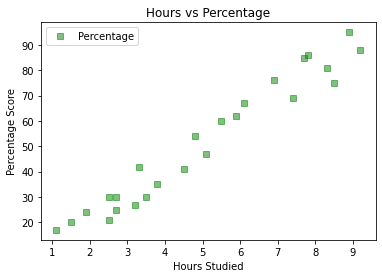

In [4]:
data.plot(x='Hours', y='Scores',color='green',alpha=0.5, style='s', label='Percentage')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

It can be inferred from the graph that there is a linear relationship between hours studied and the score obtained 

# Preparing the data

Preparing the data for training by splitting the dataset into training and test sets.

In [5]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

# Training the algorithm 

In [7]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=17) 

In [9]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train) 

print("Training complete.")

Training complete.


Plotting the regression line along with the data points from the test data.

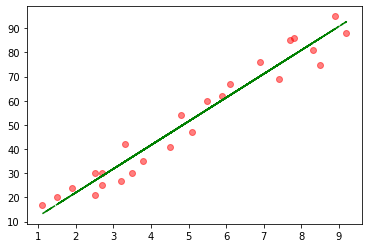

In [23]:
line = reg.coef_*x+reg.intercept_

plt.scatter(x, y, color='r', alpha=0.5)
plt.plot(x, line, '-.g');
plt.show()

Predicting the scores 

In [24]:
print(x_test) 
pred_score = reg.predict(x_test)


[[2.7]
 [2.5]
 [6.1]
 [7.4]
 [1.5]]


Comparing Actual vs Predicted scores

In [25]:
frame = pd.DataFrame({'Actual': y_test, 'Predicted': pred_score})  
frame 

,Actual,Predicted
0,30,28.903996
1,21,26.939534
2,67,62.299852
3,69,75.068856
4,20,17.117224


# Task 1 Solution

Predicting the score of a student who studied for 9.5 hours

In [26]:
hours = np.array(9.25).reshape((-1,1))
own_pred = reg.predict(hours)
print("Hours Studied = ",hours)
print("Predicted Score = ",own_pred[0])

Hours Studied =  [[9.25]]
Predicted Score =  93.24013077676602


# Evaluating the Model

In [27]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, pred_score)) 

Mean Absolute Error: 4.137463575529366
